In [0]:
from fastai.vision import *

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datapath = Path('/content/drive/My Drive/fast.ai v3/datasets')

In [4]:
datapath.ls()

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/oxford-iiit-pet'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/superheroes'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/planet'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/.ipynb_checkpoints')]

In [5]:
path = untar_data(URLs.MNIST,dest = datapath)

In [6]:
path.ls()

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/testing'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training')]

In [0]:
# creating an imagelist
il = ImageList.from_folder(path,convert_mode='L')
# look more into conversion from color to grayscale to know about 
# the latter paramter

In [8]:
il.items[0]

PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/testing/2/995.png')

In [9]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /content/drive/My Drive/fast.ai v3/datasets/mnist_png

In [0]:
defaults.cmap = 'binary' 
# dichromatic dataset

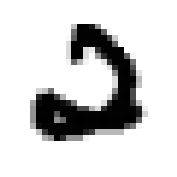

In [11]:
il[0].show()

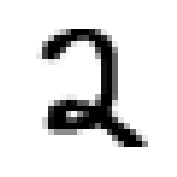

In [12]:
il[1].show()

In [0]:
# creating split
sd = il.split_by_folder(train='training',valid='testing')

In [14]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /content/drive/My Drive/fast.ai v3/datasets/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /content/drive/My Drive/fast.ai v3/datasets/mnist_png;

Test: None

having a look at how they are named for extracting labels

In [17]:
(path/'training').ls()

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/2'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/7'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/9'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/8'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/5'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/3'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/4'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/6'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/0'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/mnist_png/training/1')]

In [0]:
# note they are further distributed in folders

In [0]:
ll = sd.label_from_folder()

In [25]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
2,2,2,2,2
Path: /content/drive/My Drive/fast.ai v3/datasets/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
2,2,2,2,2
Path: /content/drive/My Drive/fast.ai v3/datasets/mnist_png;

Test: None

In [0]:
x,y = ll.train[0]

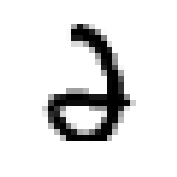

In [28]:
x.show()

In [30]:
y

Category 2

In [0]:
# proceeding with transforms
# not a great scope for augmentation in this case 
# as that might distort the labels
# so..
# using only random padding 

In [0]:
tfms = ([*rand_pad(padding=3,size=28,mode='zeros')],[])
# second empty list argument connotes no transforms applied on validation set

In [0]:
ll = ll.transform(tfms)

In [0]:
bs = 128

not using a pretrained model this time

In [0]:
data = ll.databunch(bs=bs).normalize()
# lookup docs for getting to know the defaults of normalize

In [0]:
x,y = data.train_ds[0]

2


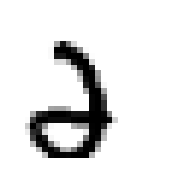

In [39]:
x.show()
print(y)

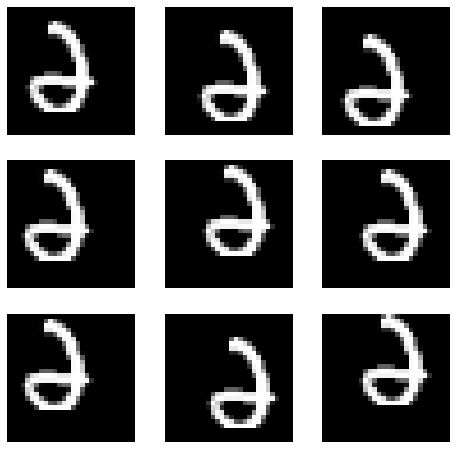

In [40]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax,cmap='gray')
# function for plotting augmented images 
plot_multi(_plot,3,3,figsize=(8,8))

In [41]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

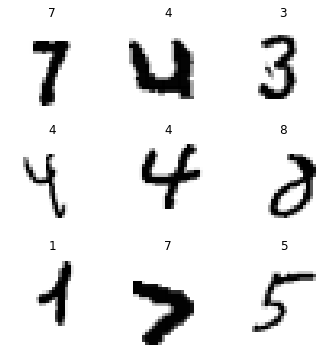

In [42]:
data.show_batch(rows=3,figsize=(5,5))

# rudimentary CNN with batch norm

In [0]:
# defining a conv method using nn.Conv2d to set the defaults so 
# that they don't need to be typed out multiple times

In [0]:
def conv(ni,nf): return nn.Conv2d(ni,nf,kernel_size=3,stride=2,padding=1)

In [46]:
doc(nn.Conv2d) # brush up on the parameters

In [0]:
model = nn.Sequential(
    conv(1,8), # 14: represents height/width
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8,16), #7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16,32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32,16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16,10), # 1
    nn.BatchNorm2d(10),
    Flatten() # squeezes the tensor : removes unnecessary 1*1 h*w
)

In [0]:
learn = Learner(data,model,loss_func = nn.CrossEntropyLoss(),metrics=accuracy)

In [64]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [0]:
xb = xb.cuda()

In [66]:
model(xb).shape

torch.Size([128, 10])

In [67]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


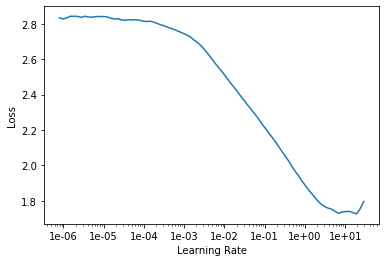

In [69]:
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(3,slice(0.5))

epoch,train_loss,valid_loss,accuracy,time
0,0.324570,0.209606,0.933700,02:26
1,0.190138,0.152301,0.952300,02:25
2,0.092121,0.048774,0.985500,02:23


# read up on skip connections (also known as identiy connections) 
# they help in smoothening out loss contours for deeper networks

# that's resnetish : adding the original 
# but when you concatenate the original to the intermediate 
# output of some layers-- >that's densenetish:
# read both  the papers to know more

using the resnetish way of things in this instance

but training more before that

refactoring code for integrating batchnorm and Relu in one func

In [73]:
doc(conv_layer)

In [0]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [0]:
model = nn.Sequential(
    conv2(1,8), # 14
    conv2(8,16), # 7
    conv2(16,32), #4
    conv2(32,16), #2
    conv2(16,10), #1
    Flatten()
)

In [0]:
learn = Learner(data,model,loss_func = nn.CrossEntropyLoss(),
                metrics=accuracy)

In [78]:
learn.fit_one_cycle(10,slice(0.1))

epoch,train_loss,valid_loss,accuracy,time
0,0.219757,0.276851,0.910200,02:23
1,0.196436,0.133319,0.956000,02:23
2,0.165417,0.092046,0.972200,02:22
3,0.132194,0.094671,0.968900,02:18
4,0.127358,0.113234,0.965600,02:19
5,0.111637,0.069537,0.977300,02:19
6,0.082442,0.056408,0.983200,02:18
7,0.059036,0.041537,0.987300,02:16
8,0.052785,0.031259,0.989500,02:17
9,0.044936,0.028363,0.990900,02:15


adding resnetish skip connections now

In [0]:
class ResBlock(nn.Module):
    def __init__(self,nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
    def forward(self,x) : return x + self.conv2(self.conv1(x))

In [84]:
help(res_block) # this uses the 
# dense_net architechture if explicitly mentioned

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [0]:
# adding res_blocks (using the fastai version)
model = nn.Sequential(
    conv2(1,8),
    res_block(8),
    conv2(8,16),
    res_block(16),
    conv2(16,32),
    res_block(32),
    conv2(32,16),
    res_block(16),
    conv2(16,10),
    Flatten()
)

In [0]:
learn = Learner(data,model,loss_func = nn.CrossEntropyLoss(),metrics=accuracy)

the default end_lr is smalller than needed and it doesn't 
help in getting the idea of when explosion occurs

In [91]:
learn.lr_find(end_lr= 100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


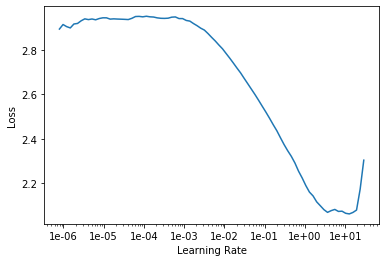

In [92]:
learn.recorder.plot()

In [94]:
learn.fit_one_cycle(6,max_lr=0.05,moms=(0.95,0.9),wd=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.191789,0.116527,0.964700,02:20
1,0.122830,0.415675,0.869000,02:20
2,0.084849,0.050378,0.985100,02:21
3,0.058853,0.043553,0.987500,02:20
4,0.034839,0.022469,0.993100,02:19
5,0.024038,0.016319,0.994600,02:20


using larger bounds for momentum than the defaults as training for lesser number of epochs so trying to achieve convergence earlier and as the loss contour is expected to be smoother than just adding more layers without skip connections so this might just be a safe bet

# Real time comments

damn.. perhaps large momentum and weight decay aren't allowing convergence ( comment on 0th to 1st epoch)<br>
but accuracy increased again in the 2nd epoch : so bouncing around : momentum will cancel out in opposite directions and do expect things to get better from here on<br>
okay,( comment on 3rd epoch) : that's kinda good, prediction held<br>
awesome: gonna get that super-convergence(comment on 4rth epoch)

Great results: achieved good results quickly<br>
for further improvement, could just train with a 
slightly lower learning rate and lower bounds for cyclical momentum <br>
but I get the idea..

In [0]:
learn.save('custom_resnet_mnist')